In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score   


In [77]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [78]:
train_data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [79]:
train_data.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [81]:
train_data['Popularity'].fillna(train_data['Popularity'].mean(), inplace=True)

train_data['key'].fillna(train_data['key'].mean(), inplace=True)

train_data['instrumentalness'].fillna(train_data['instrumentalness'].mean(), inplace=True)

In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [83]:
train_data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.218436,0.166268,0.235373,3.012651,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,5.952447,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


array([[<Axes: title={'center': 'Popularity'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'duration_in min/ms'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

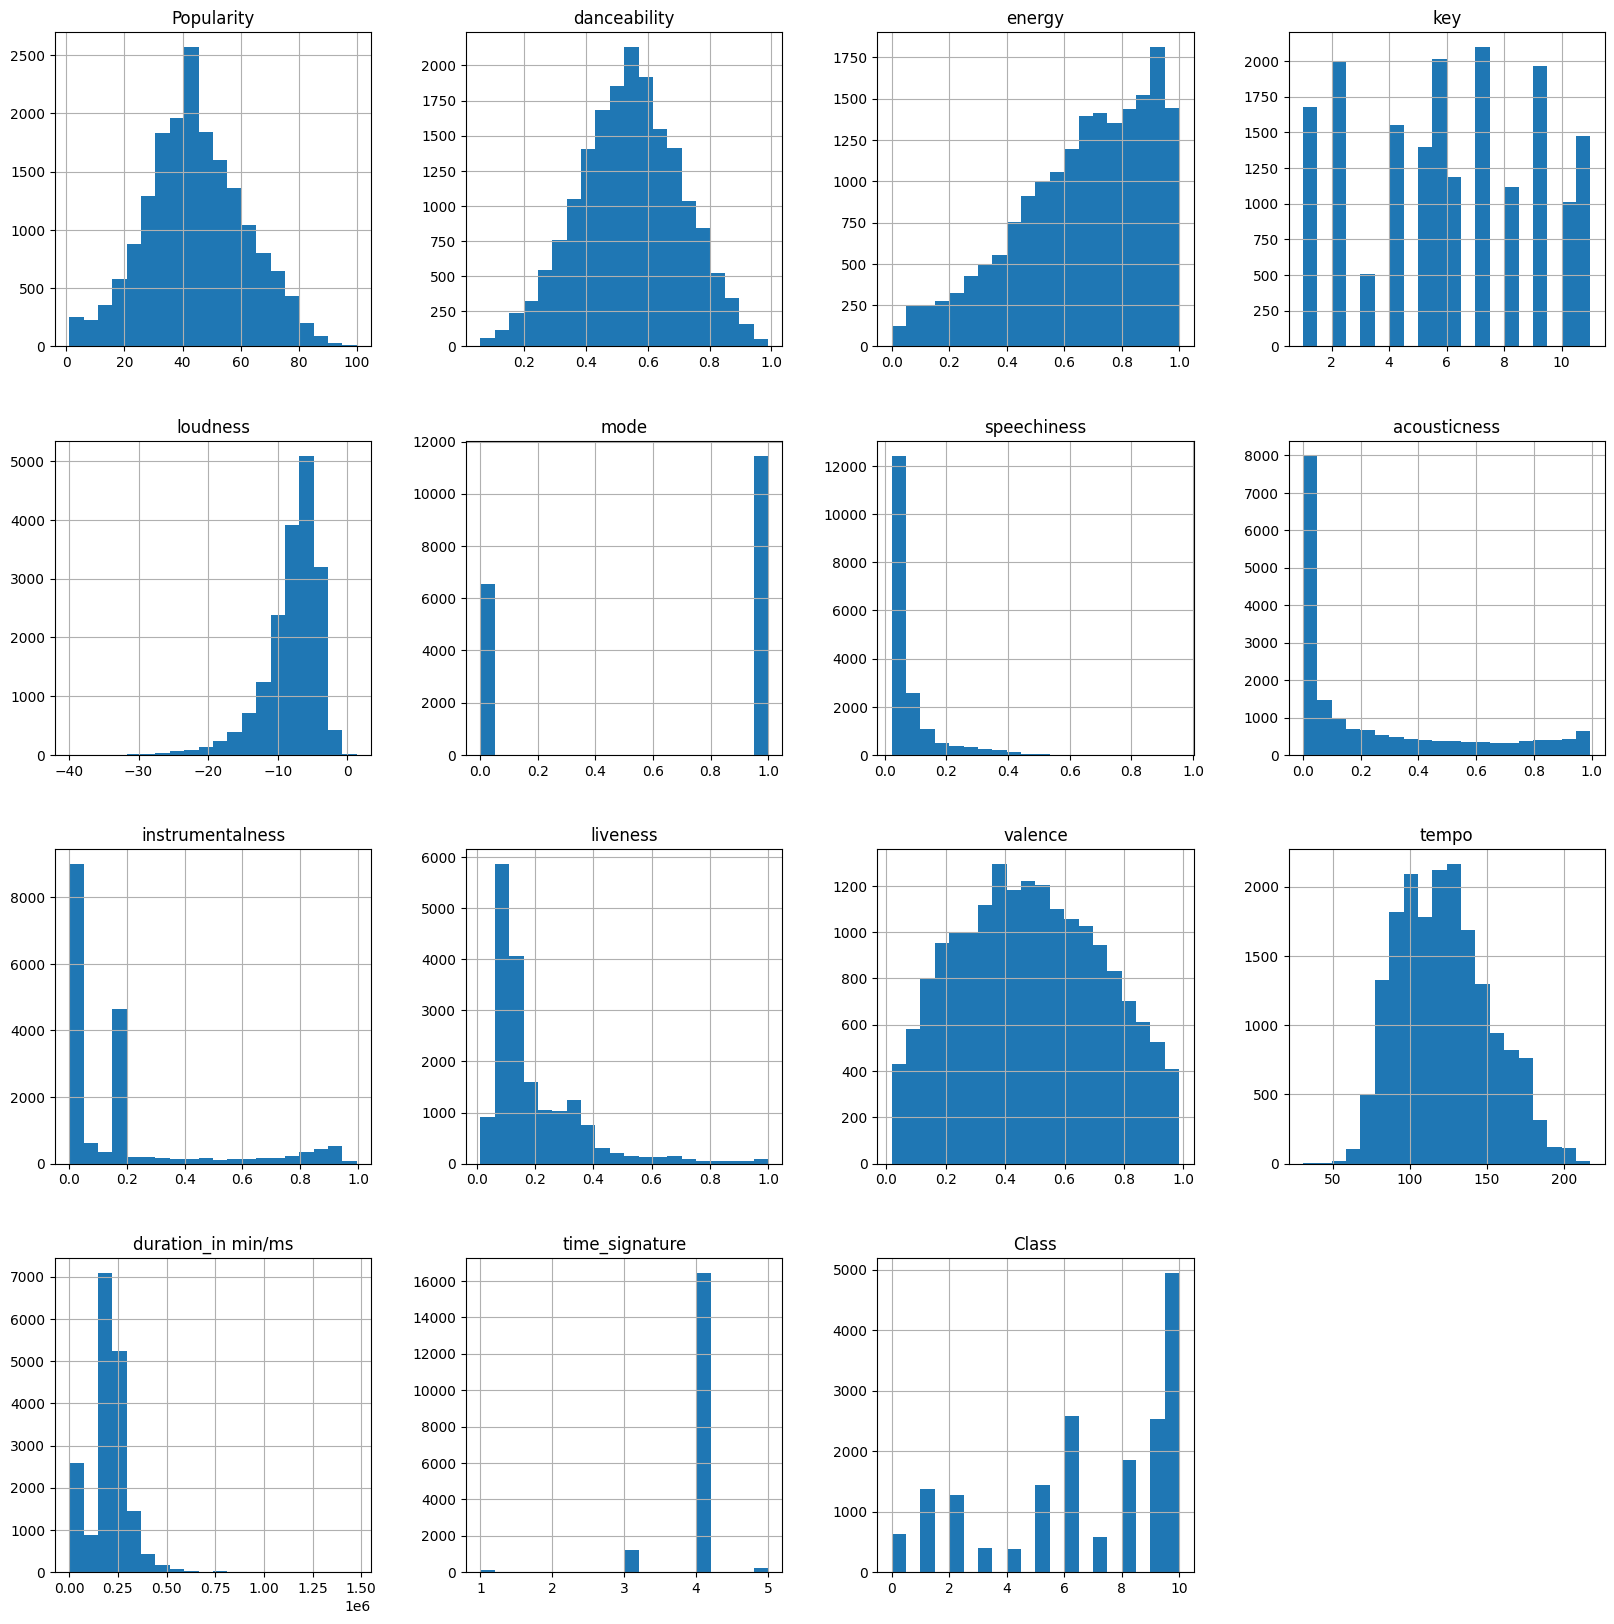

In [84]:
train_data.hist(bins=20, figsize=(20,20))

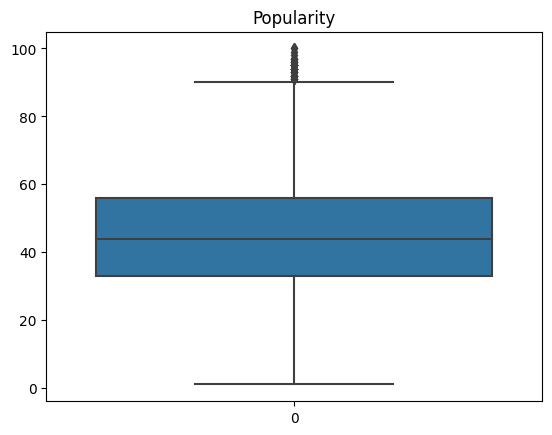

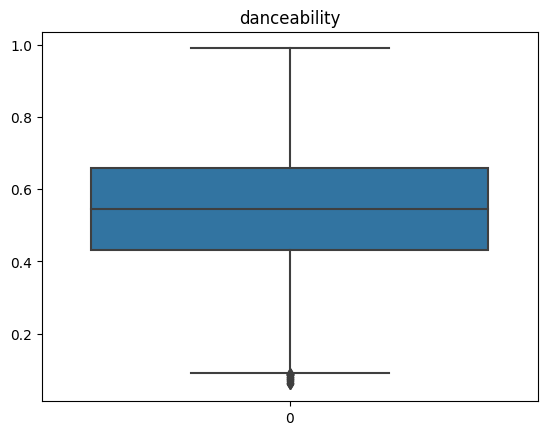

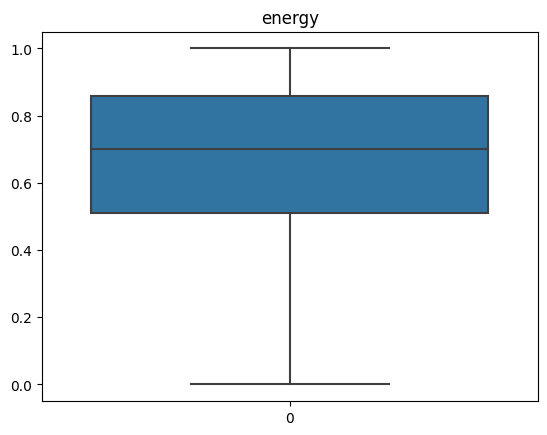

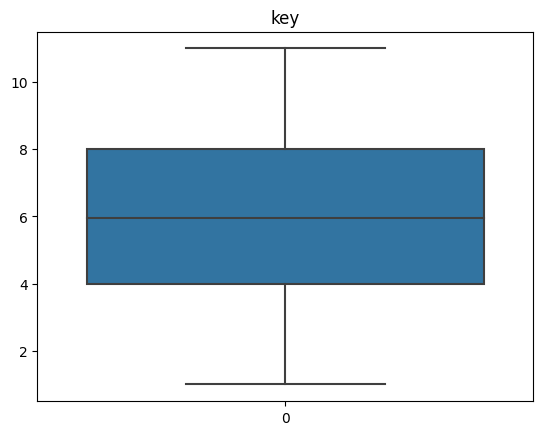

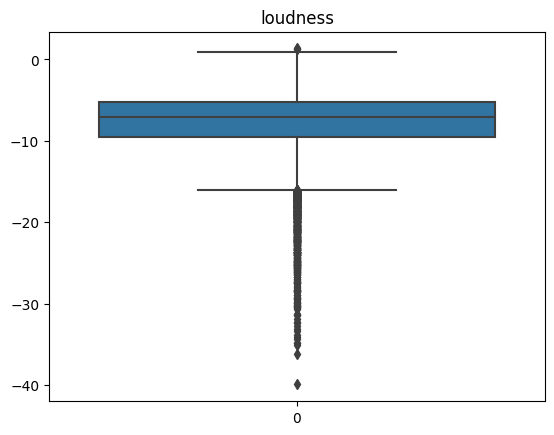

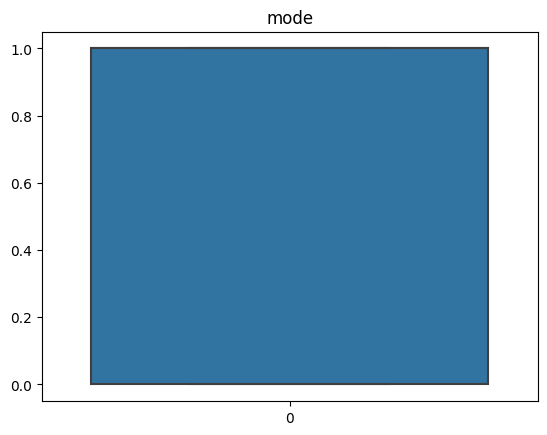

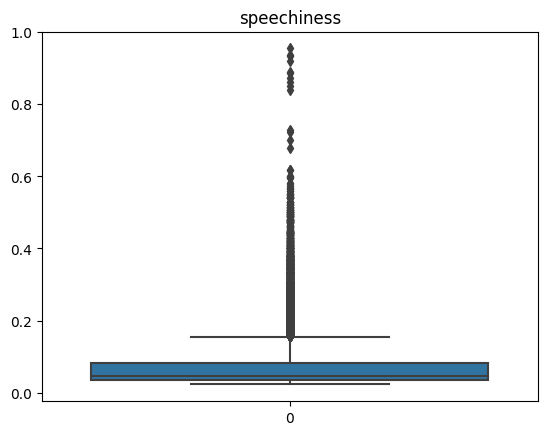

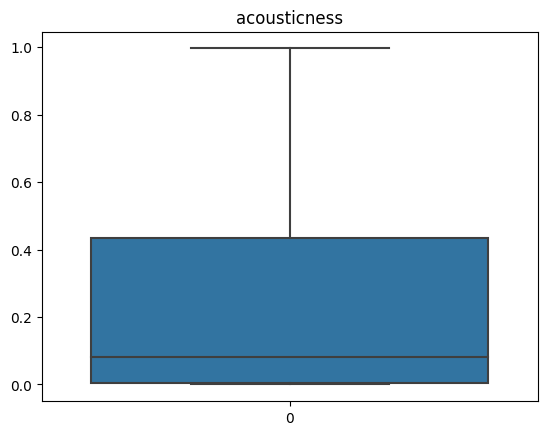

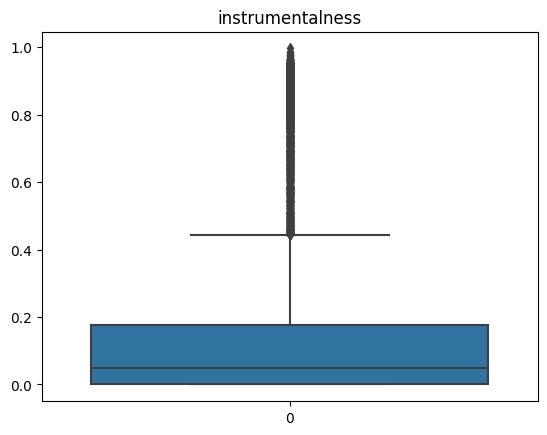

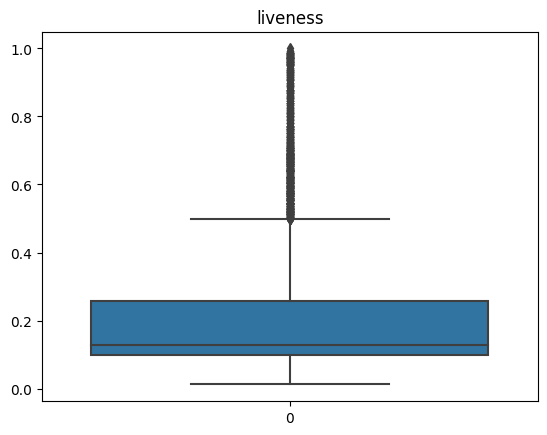

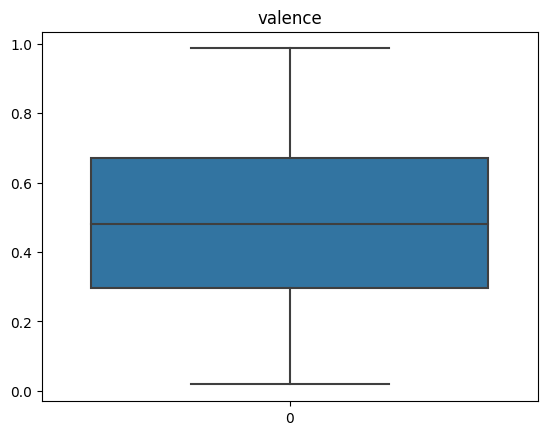

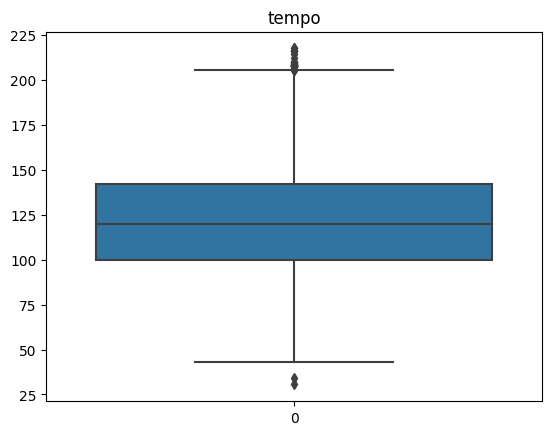

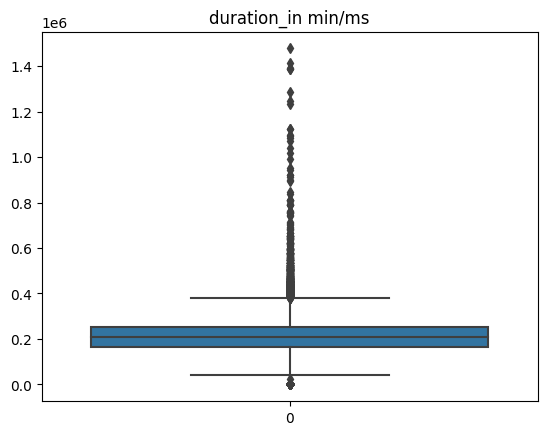

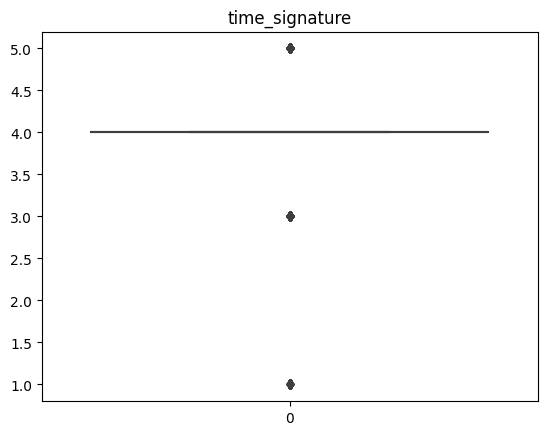

In [85]:
train_data_drop_column = train_data.drop(['Artist Name', 'Class', 'Track Name'], axis=1)
for i in train_data_drop_column.columns:
    # plt.figure(figsize=(20,10))
    sns.boxplot(train_data[i])
    plt.title(i)
    plt.show()

In [86]:
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data_drop_column), columns=train_data_drop_column.columns)
train_data_scaled

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.899519,1.867915,-0.419671,-1.643929,0.727743,0.755294,-0.373407,-0.740387,-1.049395e-16,-0.698900,1.718614,0.387130,0.302284,0.210065
1,0.551045,-0.970946,0.642500,-0.980043,0.168104,0.755294,-0.467934,-0.791896,-6.561725e-01,-0.597774,0.344694,-0.208629,0.455312,0.210065
2,-0.552454,-0.658190,-0.207237,0.015785,-0.104553,0.755294,-0.325545,0.769157,-6.705926e-01,1.242595,1.252314,0.847383,-0.813293,0.210065
3,1.247992,1.861901,-0.279465,1.343556,0.341479,-1.323988,-0.289648,-0.727188,-1.049395e-16,-0.465870,0.344694,-0.527221,-0.239105,0.210065
4,0.492966,-2.264071,1.326539,-1.311986,0.896919,0.755294,1.630811,-0.794893,-6.104621e-01,-0.151814,-1.642078,2.584879,0.260886,0.210065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-0.552454,-2.270086,-2.352824,0.347728,-2.269512,-1.323988,-0.459558,2.401358,2.444080e+00,-0.614105,-1.287357,1.655818,-0.065137,-2.555361
17992,-1.017085,0.568775,-1.868474,1.675499,-0.558982,-1.323988,-0.560068,1.966748,-6.712728e-01,-0.789348,-0.629541,-1.677582,0.502943,0.210065
17993,-0.610533,0.087612,1.352031,-0.648100,0.797142,-1.323988,-0.101790,-0.795342,-6.708195e-01,2.951060,-0.933469,-0.595971,0.138210,0.210065
17994,-0.900927,-1.975373,0.604262,0.015785,-1.196911,-1.323988,0.649642,-0.791285,2.791918e+00,0.375800,-0.546273,0.295553,0.169205,0.210065


In [87]:
train_data_scaled.corr()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Popularity,1.000000,0.165462,0.050696,0.005471,0.122269,0.016398,0.031305,-0.123409,-0.137549,-0.071693,0.054106,-0.005974,-0.030500,0.066188
danceability,0.165462,1.000000,-0.093838,0.006319,0.059723,-0.067135,0.199042,0.009055,-0.174594,-0.109485,0.444548,-0.183527,-0.121624,0.137455
energy,0.050696,-0.093838,1.000000,0.014953,0.767869,-0.035880,0.125427,-0.745963,-0.162967,0.195634,0.222998,0.210224,0.245768,0.145281
key,0.005471,0.006319,0.014953,1.000000,0.002493,-0.107048,0.001739,-0.008576,0.001169,0.014074,0.029887,0.013144,0.013670,0.006514
loudness,0.122269,0.059723,0.767869,0.002493,1.000000,-0.033650,0.096027,-0.612824,-0.318254,0.112022,0.181086,0.164272,0.172010,0.127775
mode,0.016398,-0.067135,-0.035880,-0.107048,-0.033650,1.000000,-0.074609,0.024035,-0.023207,-0.001563,-0.002986,0.021211,-0.069307,-0.019989
speechiness,0.031305,0.199042,0.125427,0.001739,0.096027,-0.074609,1.000000,-0.086648,-0.046984,0.070406,0.053885,0.048948,0.005044,0.056237
acousticness,-0.123409,0.009055,-0.745963,-0.008576,-0.612824,0.024035,-0.086648,1.000000,0.156548,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936
instrumentalness,-0.137549,-0.174594,-0.162967,0.001169,-0.318254,-0.023207,-0.046984,0.156548,1.000000,-0.041528,-0.202680,-0.033423,-0.004130,-0.057368
liveness,-0.071693,-0.109485,0.195634,0.014074,0.112022,-0.001563,0.070406,-0.111393,-0.041528,1.000000,0.021076,0.033515,0.053885,0.021546


<Axes: >

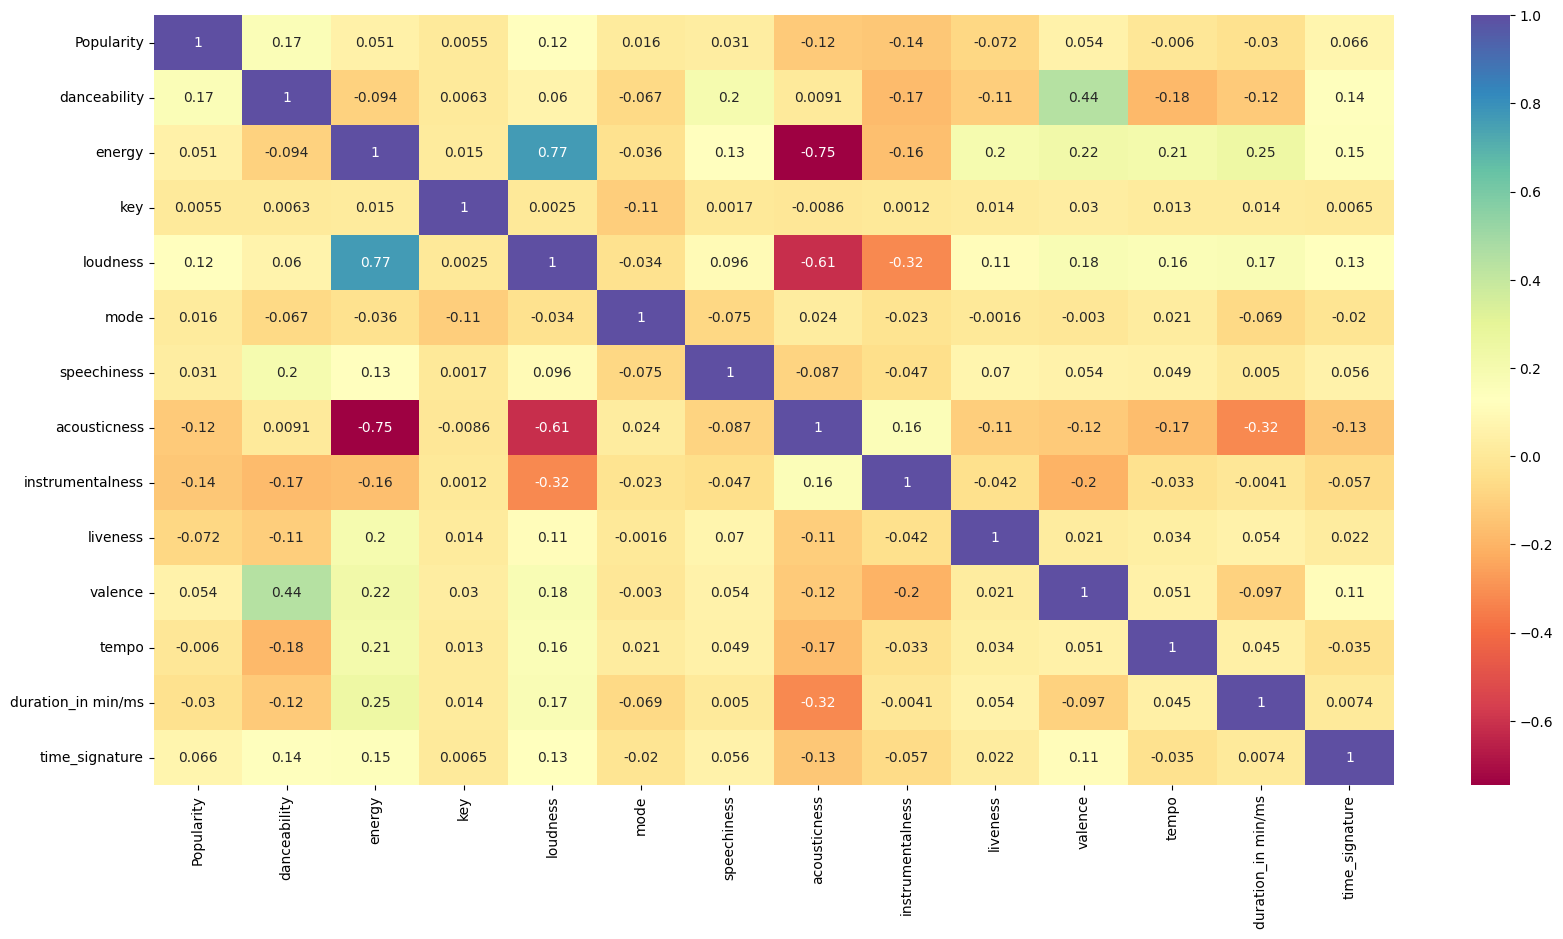

In [88]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data_scaled.corr(), annot=True, cmap='Spectral')

In [89]:
test_data.isnull().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [90]:
test_data['Popularity'].fillna(test_data['Popularity'].mean(), inplace=True)

test_data['key'].fillna(test_data['key'].mean(), inplace=True)

test_data['instrumentalness'].fillna(test_data['instrumentalness'].mean(), inplace=True)

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7713 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 7713 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    7713 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [93]:
test_data_drop_column = test_data.drop(['Artist Name', 'Track Name'], axis=1)
test_data_scaled = pd.DataFrame(scaler.fit_transform(test_data_drop_column), columns=test_data_drop_column.columns)

In [101]:
# lg_model = LogisticRegression()
# lg_model.fit(train_data_scaled, train_data['Class'])

# lg_score = lg_model.score(train_data_scaled, train_data['Class'])
# print('Logistic Regression Score: \n', lg_score)

# lg_pred = lg_model.predict(test_data_scaled)
# print('Logistic Regression Prediction: \n', lg_pred)

In [103]:
lg_model = LogisticRegression()
lg_model.fit(train_data_scaled, train_data['Class'])

lg_pred_train = lg_model.predict(train_data_scaled)

print('Training Data Metrics:')
print('Accuracy: ', accuracy_score(train_data['Class'], lg_pred_train))
print('Precision: ', precision_score(train_data['Class'], lg_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('Recall: ', recall_score(train_data['Class'], lg_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('F1-score: ', f1_score(train_data['Class'], lg_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification

lg_pred_test = lg_model.predict(test_data_scaled)
print('\nLogistic Regression Prediction on Test Data: \n', lg_pred_test)

Training Data Metrics:
Accuracy:  0.49683262947321627
Precision:  0.46338389388653567
Recall:  0.49683262947321627
F1-score:  0.4665027810892336

Logistic Regression Prediction on Test Data: 
 [10  8  9 ...  5 10  5]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
svm_model = SVC()
svm_model.fit(train_data_scaled, train_data['Class'])

svm_pred_train = svm_model.predict(train_data_scaled)  

print('Training Data Metrics:')
print('Accuracy: ', accuracy_score(train_data['Class'], svm_pred_train))
print('Precision: ', precision_score(train_data['Class'], svm_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('Recall: ', recall_score(train_data['Class'], svm_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('F1-score: ', f1_score(train_data['Class'], svm_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification

svm_pred_test = svm_model.predict(test_data_scaled)
print('\nSVM Prediction on Test Data: \n', svm_pred_test)

Training Data Metrics:
Accuracy:  0.570348966436986
Precision:  0.6048615206263229
Recall:  0.570348966436986
F1-score:  0.5396290852863976

SVM Prediction on Test Data: 
 [10  8  9 ...  5 10  5]


In [105]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_data_scaled, train_data['Class'])

dt_pred_train = dt_model.predict(train_data_scaled)

print('Training Data Metrics:')
print('Accuracy: ', accuracy_score(train_data['Class'], dt_pred_train))
print('Precision: ', precision_score(train_data['Class'], dt_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('Recall: ', recall_score(train_data['Class'], dt_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification
print('F1-score: ', f1_score(train_data['Class'], dt_pred_train, average='weighted'))  # Use appropriate average method if it's a multi-class classification

dt_pred_test = dt_model.predict(test_data_scaled)
print('\nDecision Tree Prediction on Test Data: \n', dt_pred_test)

Training Data Metrics:
Accuracy:  0.9053122916203601
Precision:  0.9268373639811858
Recall:  0.9053122916203601
F1-score:  0.9085252641843903

Decision Tree Prediction on Test Data: 
 [ 6 10  9 ...  3  1  5]


In [107]:
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracy = [accuracy_score(train_data['Class'], pred) for pred in [lg_pred_train, svm_pred_train, dt_pred_train]]
precision = [precision_score(train_data['Class'], pred, average='weighted') for pred in [lg_pred_train, svm_pred_train, dt_pred_train]]
recall = [recall_score(train_data['Class'], pred, average='weighted') for pred in [lg_pred_train, svm_pred_train, dt_pred_train]]
f1 = [f1_score(train_data['Class'], pred, average='weighted') for pred in [lg_pred_train, svm_pred_train, dt_pred_train]]

df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

df

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.496833,0.463384,0.496833,0.466503
1,SVM,0.570349,0.604862,0.570349,0.539629
2,Decision Tree,0.905312,0.926837,0.905312,0.908525
